##  Import Libraries

In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Define Paths and Check Files

In [2]:
# Define path
data_path = r'C:\Users\shail\Downloads\spam\spam.csv'

# Check if file exists
assert os.path.exists(data_path), f"File not found: {data_path}"

# List the contents of the directory (for troubleshooting)
data_directory = r'C:\Users\shail\Downloads\spam'
files = os.listdir(data_directory)
print("Files in directory:", files)

Files in directory: ['.ipynb_checkpoints', 'SPAM SMS DETECTION.ipynb', 'spam.csv']


## Load and Preprocess the Dataset

In [3]:
# Load the dataset
data = pd.read_csv(data_path, encoding='latin-1')

# Display the first few rows
print(data.head())

# Drop unnecessary columns
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns for ease of use
data.columns = ['label', 'message']

# Encode labels: ham -> 0, spam -> 1
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Display the first few rows after preprocessing
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


## Split the Data

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Display the shapes of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (4457,)
Testing data shape: (1115,)


## Vectorize the Text Data

In [5]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Display the shape of the TF-IDF vectors
print(f"TF-IDF train shape: {X_train_tfidf.shape}")
print(f"TF-IDF test shape: {X_test_tfidf.shape}")

TF-IDF train shape: (4457, 7735)
TF-IDF test shape: (1115, 7735)


## Train and Evaluate Models

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



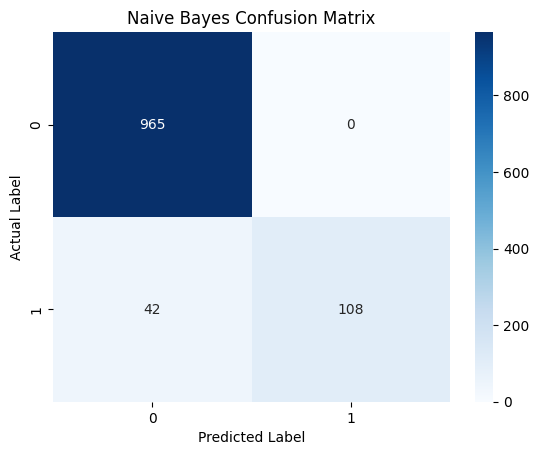

In [6]:
# Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict and evaluate the Naive Bayes model
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Logistic Regression

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



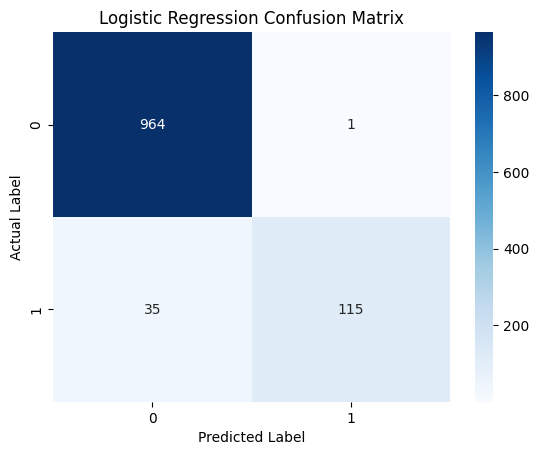

In [7]:
# Train a Logistic Regression classifier
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Predict and evaluate the Logistic Regression model
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Support Vector Machine

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



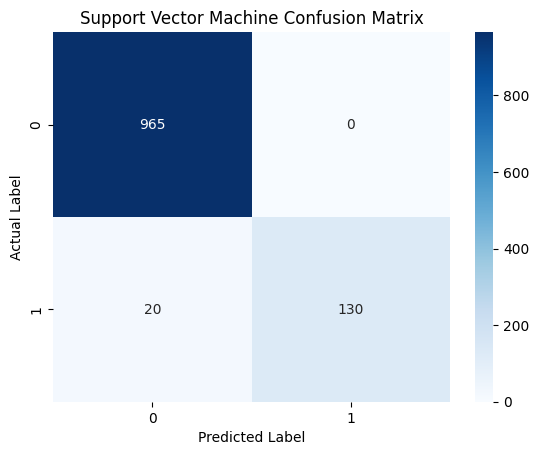

In [8]:
# Train a Support Vector Machine classifier
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

# Predict and evaluate the Support Vector Machine model
y_pred_svm = svm_model.predict(X_test_tfidf)
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Compare Model Performance

In [9]:
# Compare model performance
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))

Naive Bayes Accuracy: 0.9623318385650225
Logistic Regression Accuracy: 0.967713004484305
Support Vector Machine Accuracy: 0.9820627802690582


## Overview
In this project, we aim to build a machine learning model that can classify SMS messages as spam or legitimate (ham). We'll use techniques like TF-IDF for text vectorization and classifiers such as Naive Bayes, Logistic Regression, and Support Vector Machines (SVM).

## Conclusion
we build and evaluate several machine learning models to detect spam SMS messages. The project demonstrates the importance of data preprocessing, feature extraction, and model evaluation in machine learning workflows. The visualizations and performance metrics provide a clear understanding of each model's effectiveness.